<h1>A New Interpretation of Information Rate</h1>



Let us consider a communication channel which is used to transmit the results of a chance situation before those results become common knowledge, so that a gambler may still place bets at the original odds.

<h3>Noiseless Binary Channel</h3>



Consider first the case of a **noiseless** binary channel.
In this case his capital would grow exponentially and after N bets he would have 2N times his original bankroll.

Exponential rate of growth of the gambler's capital G:

\begin{equation}
  G = \lim_{N\to\infty} \frac{1}{N} \log_2 \frac{V_N}{V_0}
\end{equation}

Where:

$V_N$ = gambler's capital after N bets

$V_0$ = starting capital

If $V_N$ = $2^N$ times the original bankroll:

$$
\begin{equation}
  G = \lim_{N\to\infty} \frac{1}{N} \log_2 \frac{(2^N)V_0}{V_0} = \lim_{N\to\infty} \frac{1}{N} \log_2 (2^N) = \lim_{N\to\infty} \frac{1}{N} N = 1
\end{equation}
$$

<h3>Noisy Binary Channel</h3>

Consider the case of a **noisy** binary channel.

Each transmission symbol has a probability $p$ of error and $q$ of correct transmission.

If the gambler still bet his entire capital each time:

\begin{equation}
  <V_N> = ( 2q )^N V_0
\end{equation}

Where:

$<V_N>$ = expected value of capital

<font color='red'>⚠️ broke if N is large!</font>

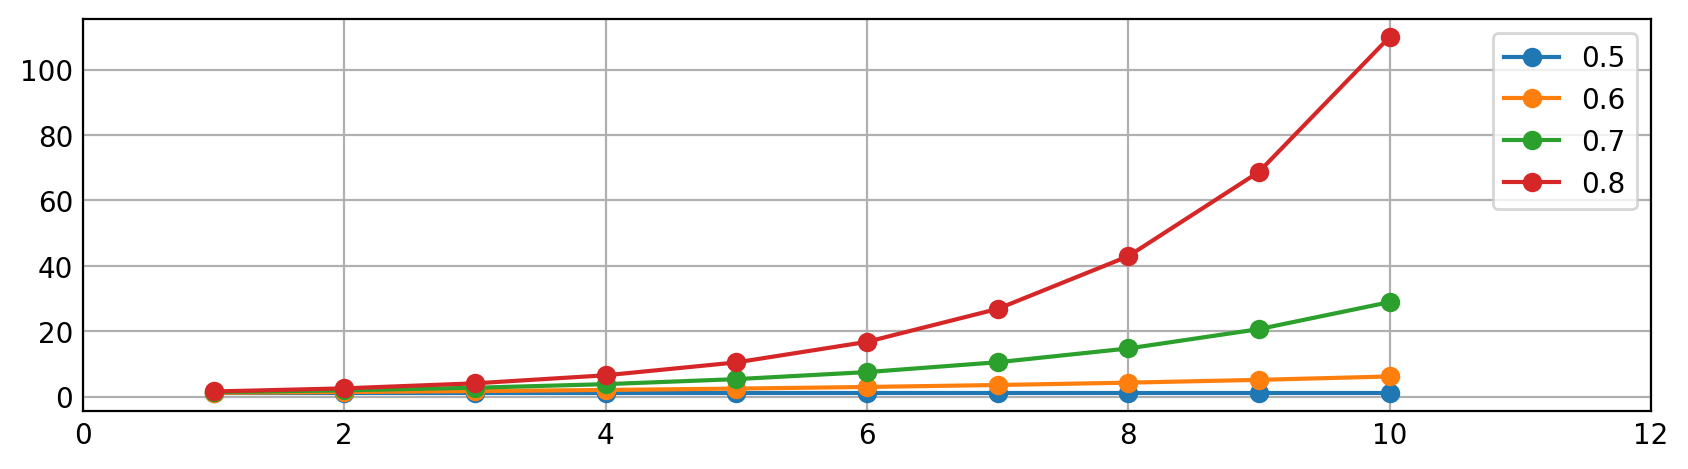

In [150]:
# @title Expected Value if the gambler bets his entire capital {"display-mode":"form"}
import numpy as np

V0 = 1      # Starting Captital V0 = 1 dollar
N = np.arange(1, 11, 1)      # N = total number of bets
# N
# array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
Q = np.arange(0.5, 1.05, 0.1)      # q = probability of winning the bet
# Q
# array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

VN = [(2*q)**N for q in Q]


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 2]
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()

#ax.set_yscale("log")

ax.plot(N, VN[0], color='tab:blue', marker='o', label=Q[0])
ax.plot(N, VN[1], color='tab:orange', marker='o', label=Q[1])
ax.plot(N, VN[2], color='tab:green', marker='o', label=Q[2])
ax.plot(N, VN[3], color='tab:red', marker='o', label='0.8')

ax.set(xlim=(0,12))

plt.legend()
plt.show()

<font color='red'>As you can see, not only is the Expected Value for $V_N$ always > $V_0$ = 1 dollar for any q > 0.5, but $<V_N> \to\infty$ for N >> 1, as $<V_N>$ grows exponentially with N. <p>However, the vast majority of gamblers will get broke really quickly.
<p>⚠️ $P(broke) \to 1$ if N is large! (N >> 1)
</font>

<h3>Example</h3>

1000 gamblers, V0 = 1$, q = 0.7

|N    | gamblers broke | gamblers with capital | capital VN |
| --- | --- | --- | --- |
| 1   | 300 | 700 | 2  |
| 2   | 510 | 490 | 4  |
| 3   | 657 | 343 | 8  |
| 4   | 760 | 240 | 16 |
| ..  | ... | ... | .. |

In general, for any $q$, $P(broke) = 1 - q^N$

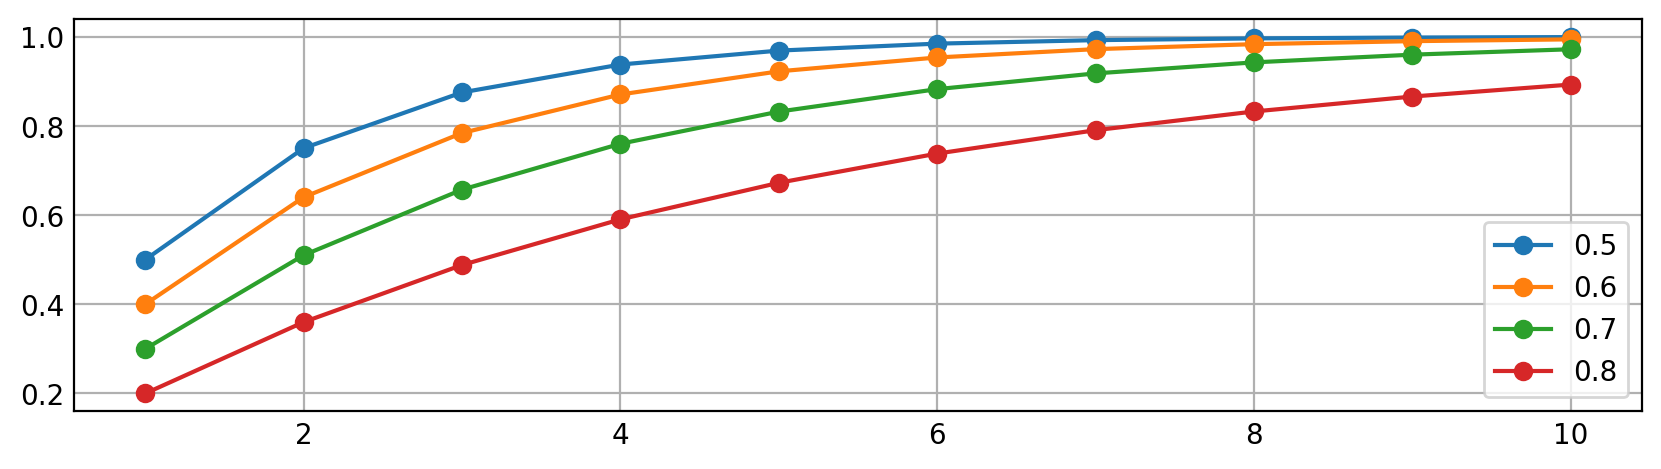

In [148]:
# @title Probability of going bankrupt {"display-mode":"form"}
import numpy as np

V0 = 1      # Starting Captital V0 = 1 dollar
N = np.arange(1, 11, 1)      # N = total number of bets
# N
# array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
Q = np.arange(0.5, 1.05, 0.1)      # q = probability of winning the bet
# Q
# array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

P = [1 - q**N for q in Q]


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 2]
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()

#ax.set_yscale("log")

ax.plot(N, P[0], color='tab:blue', marker='o', label=Q[0])
ax.plot(N, P[1], color='tab:orange', marker='o', label=Q[1])
ax.plot(N, P[2], color='tab:green', marker='o', label=Q[2])
ax.plot(N, P[3], color='tab:red', marker='o', label='0.8')

plt.legend()
plt.show()

<h3>Fraction of Capital</h3>

Let us assume that the gambler bets a fraction, $l$, of his capital each time. Then:

\begin{equation}
  V_N = (1+l)^W (1-l)^L V_0
\end{equation}

Where $W$ and $L$ are the number of wins and losses in the N bets. Then

$$
\begin{aligned}
  G &= \lim_{N\to\infty} \frac{1}{N} \log_2 \frac{V_N}{V_0} = \lim_{N\to\infty} \frac{1}{N} \log_2 (1+l)^W (1-l)^L  \\\\
  G &= \lim_{N\to\infty} \frac{W}{N} \log_2 (1+l) + \frac{L}{N} \log_2 (1-l) \\\\
    &= q \log_2 (1+l) + p \log_2 (1-l)
\end{aligned}
$$

with probability one.